In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [88]:
# import the classification models
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,GradientBoostingRegressor

In [89]:
# import the metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report



In [90]:
df=pd.read_csv("marketing_campaign.csv",sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [91]:
df1=df.copy()

In [92]:
df.shape

(2240, 29)

We have a dataset containing customer information, including demographic data, transaction history, and previous campaign interactions. The dataset also includes a binary target variable indicating whether the customer responded to the offer or not.


In [93]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [94]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [95]:
df["Dt_Customer"]=pd.to_datetime(df["Dt_Customer"],format='%d-%m-%Y')

In [96]:
df.duplicated("ID").sum()

np.int64(0)

So there are no duplicated ids

In [97]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Income column has null values

In [98]:
df=df.dropna()
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [99]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Numeric Data


In [100]:
num_vars=[
    'Year_Birth', 'Income', 'Kidhome','Teenhome','Recency', 
    'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
]


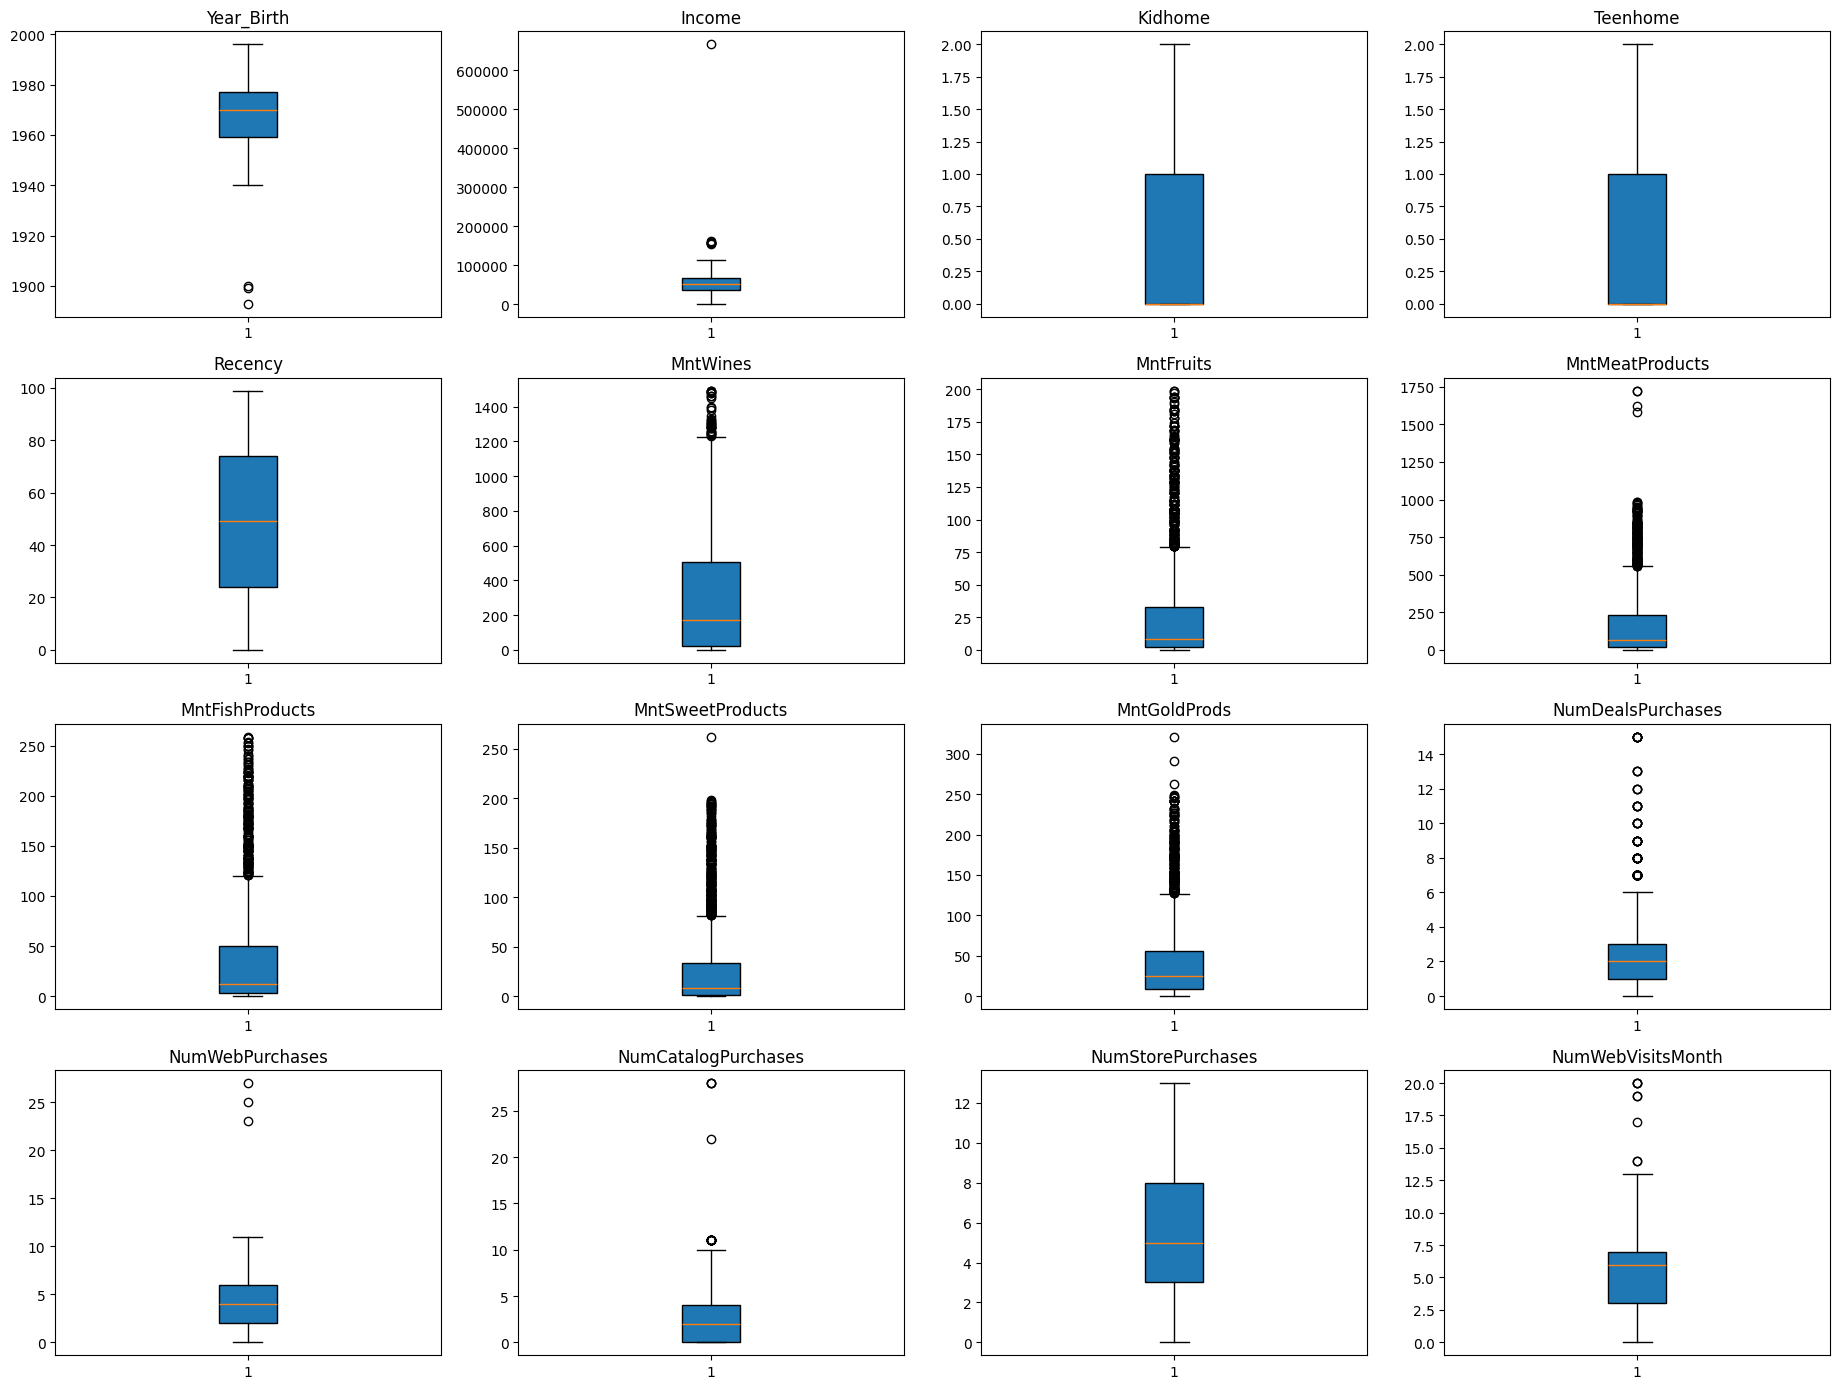

In [101]:
fig, axes = plt.subplots(nrows=4,ncols=4) # create figure and axes
axes = axes.flatten() # Flatten the axes array for easy iteration
for i,col in enumerate(num_vars):
    ax=axes[i]
    box=ax.boxplot(df[col],patch_artist=True)
    ax.set_title(col)

fig.set_size_inches(18.5,14)
plt.tight_layout()
plt.show()

Outliers can have a significant impact on our machine learning model so its better that we remove them.



In [102]:
filter_df=df[df["Year_Birth"]<1920]
filter_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,1,0,0,1,0,0,0,3,11,0


In [103]:
drop_rows=filter_df.index
df.drop(drop_rows, inplace=True)


In [104]:
rows_drop=df[df["Income"]>500000]
rows_drop
rows_drop=rows_drop.index
df.drop(rows_drop, inplace=True)

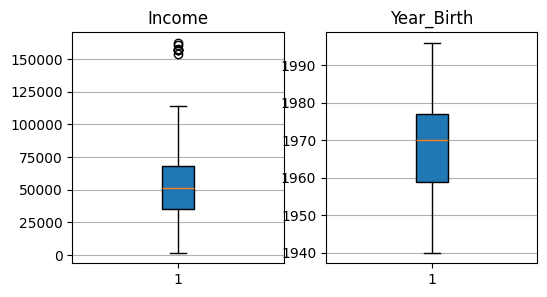

In [105]:
num_vars_detail=["Income","Year_Birth"]
fig,axes=plt.subplots(nrows=1,ncols=2)#create the figure and the axes
axes=axes.flatten()
for i, col in enumerate(num_vars_detail):
    ax=axes[i]
    box=ax.boxplot(df[col],patch_artist=True)
    ax.set_title(col)
    ax.yaxis.grid(True)

fig.set_size_inches(6,3)
plt.show()


# categorical data

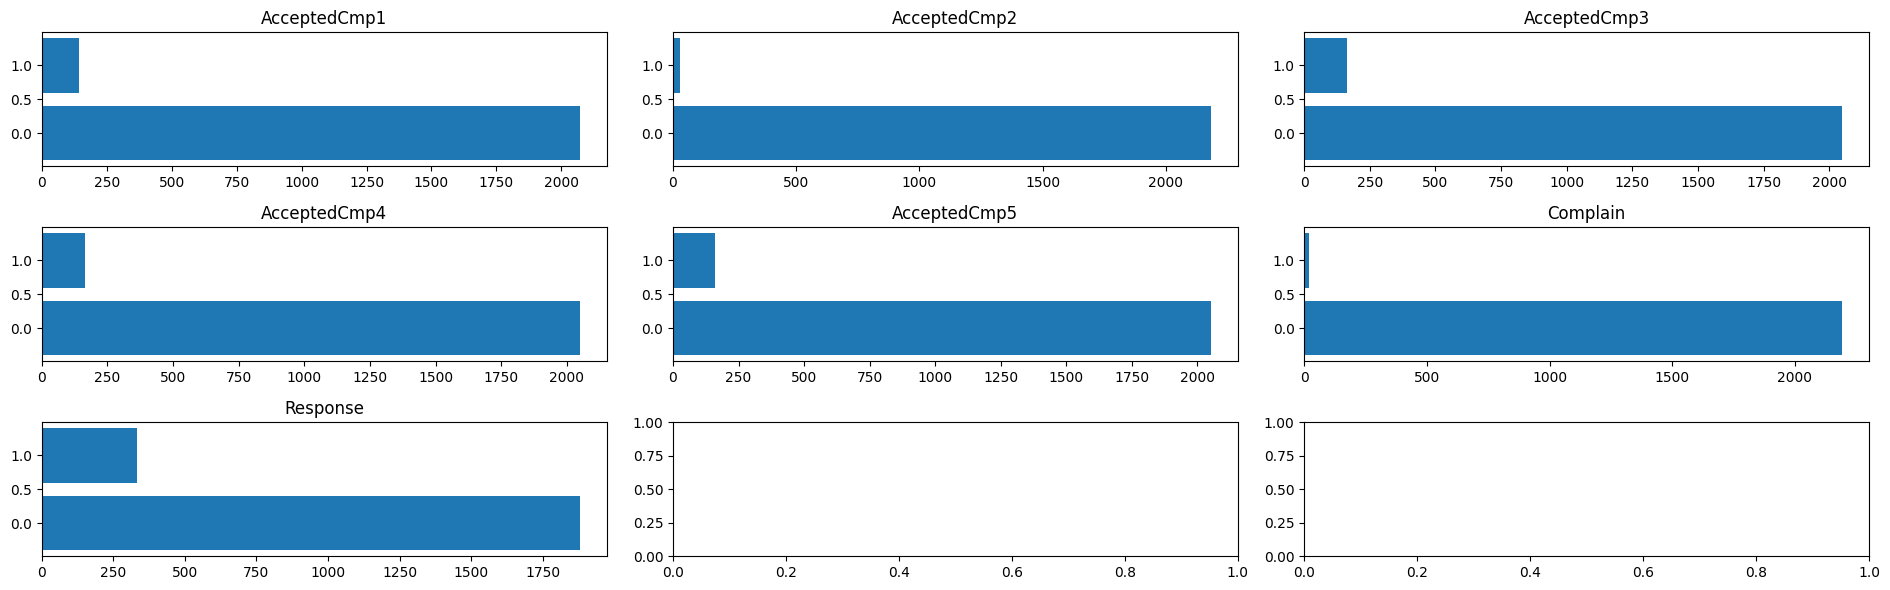

In [106]:
cat_vars = [
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
    'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response'
]

fig,axes=plt.subplots(nrows=3, ncols=3, figsize=(19,6))
axes=axes.flatten()

for i, col in enumerate(cat_vars):
    ax=axes[i]
    count=df[col].value_counts()
    ax.barh(count.index, count.values)
    ax.set_title(col)

plt.tight_layout()
plt.show()

1. AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4 and AcceptedCmp5: values are unbalanced, with many more 0s than 1s.
2. AcceptedCmp2 also seems suspiciously more unbalanced than the others.
3. Complain: highly unbalanced.
4. Response: not highly unbalanced.


In [107]:
df.Complain.describe()

count    2212.000000
mean        0.009042
std         0.094678
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Complain, dtype: float64

as we can only 0.09 percent of people have the complain. So we can drop the column as it is not necessary


In [108]:
df.drop("Complain",axis=1, inplace=True)

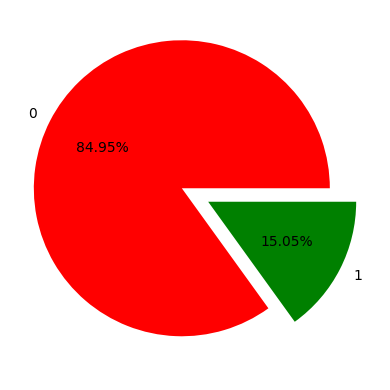

In [111]:
response_counts=df["Response"].value_counts()
fig,ax=plt.subplots(figsize=(4,4))
ax.pie(response_counts, labels=response_counts.index, autopct='%.2f%%', colors=["red","green"],explode=[0.1,0.1])
fig.tight_layout()
plt.show()



In [112]:
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [113]:
values_to_replace=["Alone","Absurd","YOLO"]
df["Marital_Status"].replace(values_to_replace,"Single",inplace=True)

df["Marital_Status"].value_counts()

Marital_Status
Married     857
Together    571
Single      477
Divorced    231
Widow        76
Name: count, dtype: int64

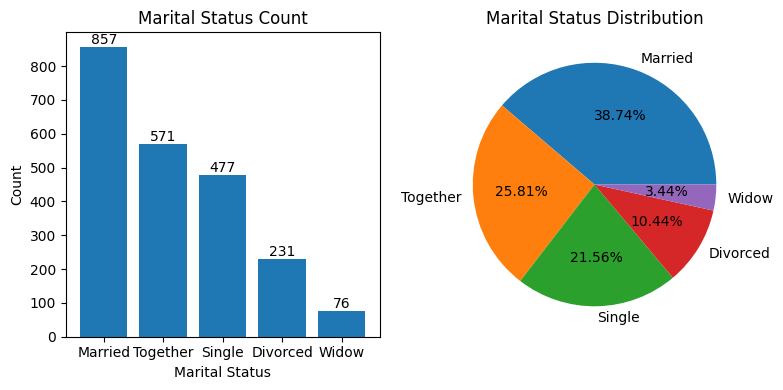

In [118]:
marital_counts=df["Marital_Status"].value_counts()

fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(8,4))

bars=axes[0].bar(marital_counts.index, marital_counts.values)
axes[0].set_xlabel("Marital Status")
axes[0].set_ylabel("Count")
axes[0].set_title("Marital Status Count")

for bar in bars:
    height= bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, height, height, ha="center", va="bottom")

axes[1].pie(marital_counts,labels=marital_counts.index, autopct="%0.2f%%")
axes[1].set_title("Marital Status Distribution")

fig.tight_layout()

plt.show()

In [119]:
df["Education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [121]:
edu_counts=df["Education"].value_counts()

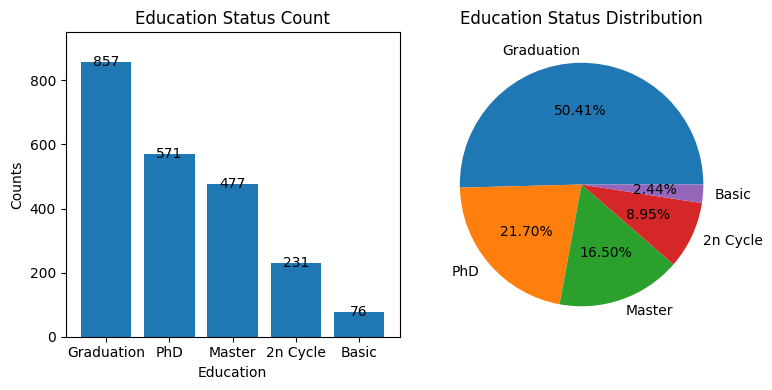

In [124]:
fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(8,4))
bars=axes[0].bar(edu_counts.index, marital_counts.values)
axes[0].set_xlabel("Education")
axes[0].set_ylabel("Counts")
axes[0].set_ylim(0,950)
axes[0].set_title("Education Status Count")

for bar in bars:
    height=bar.get_height()
    axes[0].text(bar.get_x()+ bar.get_width()/2, height, height, ha="center", va="center")

axes[1].pie(edu_counts, labels=edu_counts.index, autopct="%.2f%%")
axes[1].set_title("Education Status Distribution")

fig.tight_layout()

plt.show()

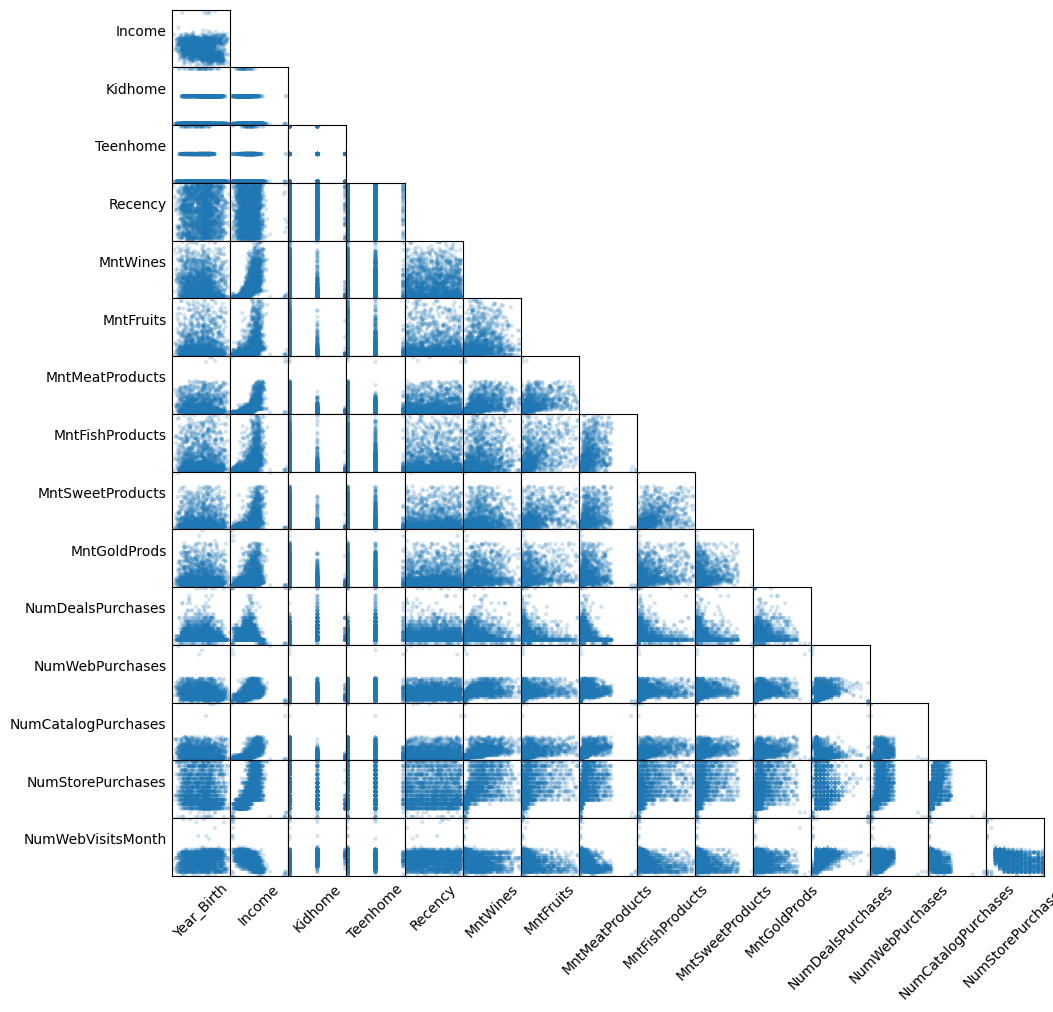

In [127]:
sm=pd.plotting.scatter_matrix(
    df[num_vars],
    figsize=(12,12), alpha=0.2
)

# hiding the subticks
for subaxis in sm:
    for ax in subaxis:
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        # rotate the label
        ax.xaxis.label.set_rotation(45)
        ax.yaxis.label.set_rotation(0)
        ax.yaxis.label.set_ha('right')

# hiding diagonal and the other half of the matrix
for i in range(np.shape(sm)[0]):
    for j in range(np.shape(sm)[1]):
        if i<=j:
            sm[i,j].set_visible(False)
    


pic=sm[0][0].get_figure()

Its hard to spot any relationship with Income and Year_Birth beacuse the outliers make their plots look compressed
Same goes for NumWebpurchases and NumWebVisitsMonth 
NumWebPurchases seems to have a positive non-linear correlation with the Mnt… variables
NumWebPurchases and NumWebVisitsMonth do not seem as highly correlated as I expected

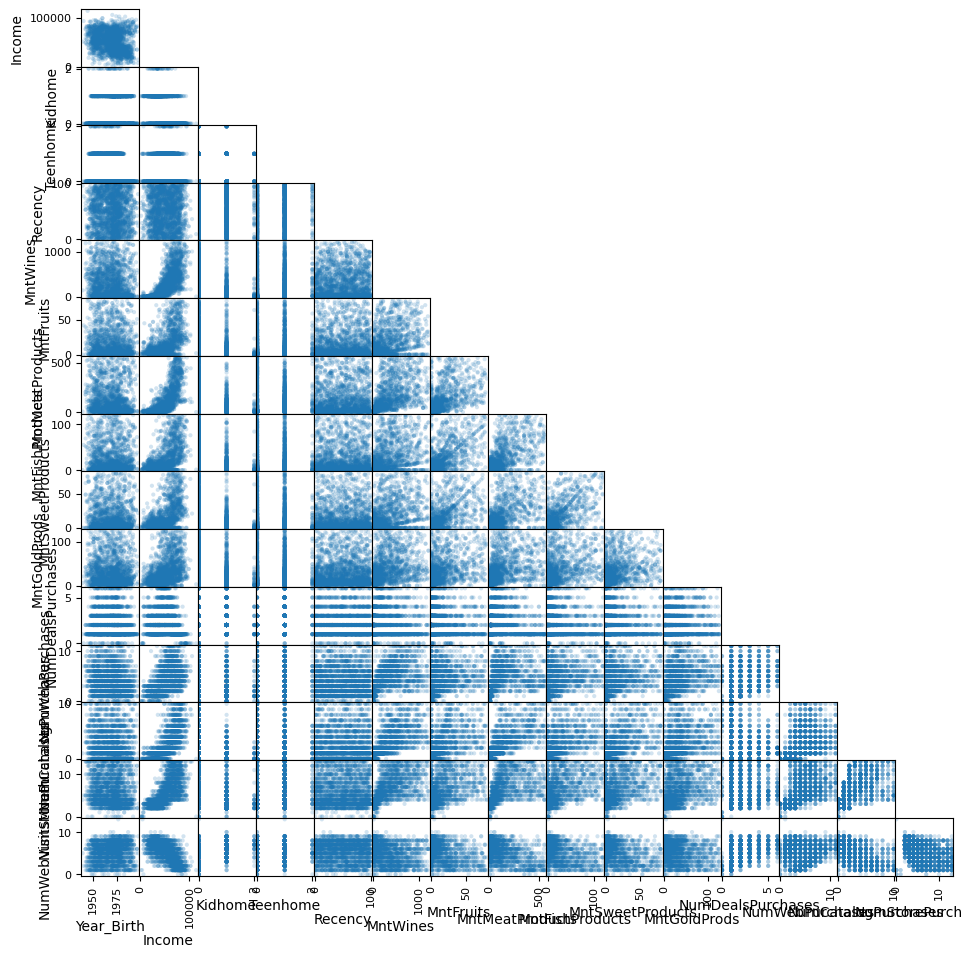

In [ ]:
df_no_outliers=df.copy()

# outlier removal- I am using IQR here
for var in num_vars:
    q1=df[var].quantile(0.25)
    q3=df[var].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper= q3+1.5*iqr
    df_no_outliers[var]=df_no_outliers[var][(df_no_outliers[var]>=lower) & (df_no_outliers[var]<=upper)]


sm=pd.plotting.scatter_matrix(
    df_no_outliers[num_vars],
    figsize=(12,12),alpha=0.2
)

# Hiding the ticks and rotating the labels
for subaxis in sm:
    for ax in subaxis:
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        ax.xaxis.label.set_rotation(45)
        ax.yaxis.label.set_rotation(0)
        ax.yaxis.label.set_ha("right")
        

for i in range(np.shape(sm)[0]):
    for j in range(np.shape(sm)[1]):
        if i<=j:
            sm[i,j].set_visible(False)

pic=sm[0][0].get_figure()


Now we can see that income is related with most of the variable while Year_of birth does not
The correlation between Income and the Mnt… variables is mostly positive and non-linear

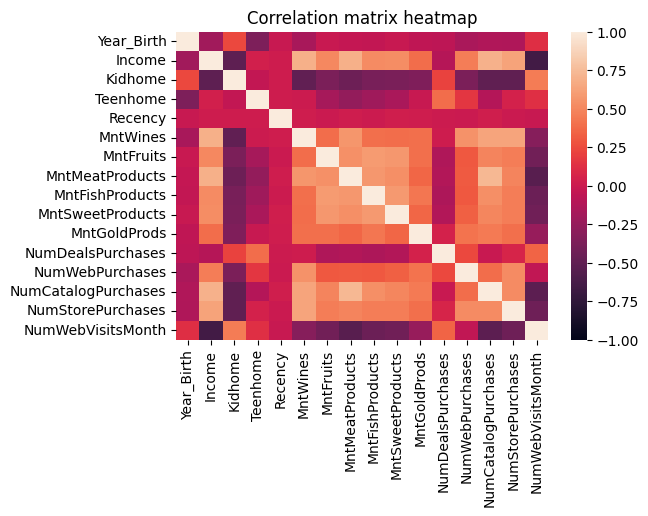

In [133]:
# confirming the realtionship with the heat map
corr=df[num_vars].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr,annot=False, vmin=-1, vmax=1)
plt.title("Correlation matrix heatmap")
plt.show()